(a) Regression: Using any of the data in previous assignment:


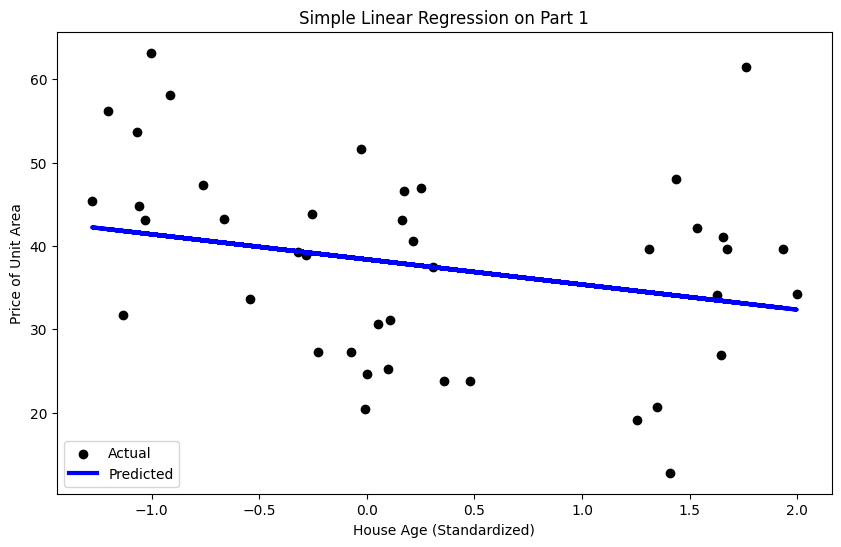

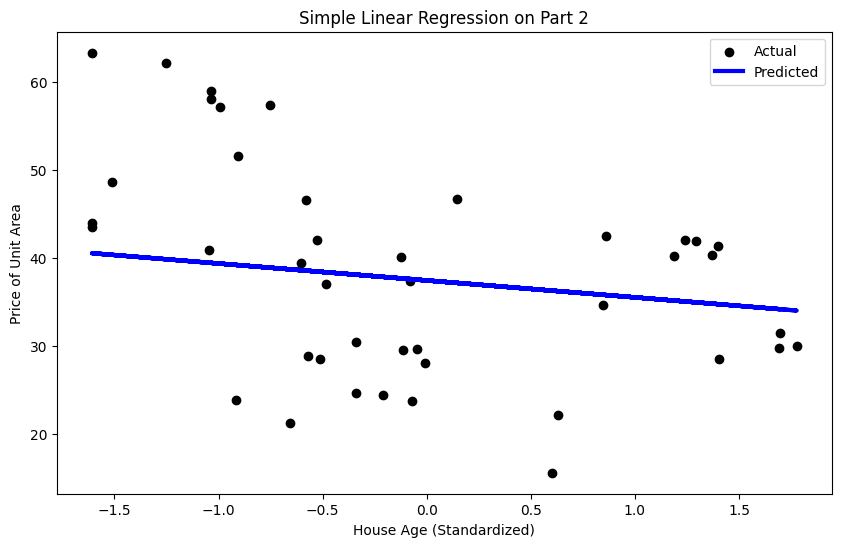

((0.4972260968656329, 69.87567666837727),
 (0.596384671340219, 57.34247404006626))

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

RealEstateData = pd.read_excel("/Users/user/Documents/RealEstateDataSet.xlsx")

#Splitting dataset
part1, part2 = train_test_split(RealEstateData, test_size=0.5, random_state=42)

#Simple Linear Regression
x1 = part1[['X2 house age']]
y1 = part1['Y house price of unit area']
x2 = part2[['X2 house age']]
y2 = part2['Y house price of unit area']

#Creating training and test sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

#x range
x_min = x1_train['X2 house age'].min()
x_max = x1_train['X2 house age'].max()

extra_small = pd.DataFrame({'X2 house age': [x_min * 0.9]})
extra_large = pd.DataFrame({'X2 house age': [x_max * 1.1]})

y_mean = y1_train.mean()
extra_y_small = pd.Series([y_mean])
extra_y_large = pd.Series([y_mean])


# Append extrapolating values to the test set
x1_test_extrapolation = pd.concat([x1_test, extra_small, extra_large]).reset_index(drop=True)
y1_test_extrapolation = pd.concat([y1_test, extra_y_small, extra_y_large]).reset_index(drop=True)


interpolation_mask = (x1_test_extrapolation['X2 house age'] >= x_min) & (x1_test_extrapolation['X2 house age'] <= x_max)
extrapolation_mask = ~interpolation_mask 

#Data standardization
scaler = StandardScaler()
x1_train_scaled = scaler.fit_transform(x1_train)
x1_test_scaled = scaler.transform(x1_test)
x2_train_scaled = scaler.fit_transform(x2_train)
x2_test_scaled = scaler.transform(x2_test)

#Part1 linear regression
lr1 = LinearRegression()
lr1.fit(x1_train_scaled, y1_train)
y1_pred = lr1.predict(x1_test_scaled)

#Part1 Plot
plt.figure(figsize=(10, 6))
plt.scatter(x1_test_scaled, y1_test, color='black', label='Actual')
plt.plot(x1_test_scaled, y1_pred, color='blue', linewidth=3, label='Predicted')
plt.title('Simple Linear Regression on Part 1')
plt.xlabel('House Age (Standardized)')
plt.ylabel('Price of Unit Area')
plt.legend()
plt.savefig('/Users/user/Documents/part1_simple_linear_regression.png')
plt.show()

#Part2 linear regression
lr2 = LinearRegression()
lr2.fit(x2_train_scaled, y2_train)
y2_pred = lr2.predict(x2_test_scaled)

#Plot2 Plot
plt.figure(figsize=(10, 6))
plt.scatter(x2_test_scaled, y2_test, color='black', label='Actual')
plt.plot(x2_test_scaled, y2_pred, color='blue', linewidth=3, label='Predicted')
plt.title('Simple Linear Regression on Part 2')
plt.xlabel('House Age (Standardized)')
plt.ylabel('Price of Unit Area')
plt.legend()
plt.savefig('/Users/user/Documents/part2_simple_linear_regression.png')
plt.show()

#Multiple Linear Regression
features_part1 = part1[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]
features_part2 = part2[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]

#Creating train and test sets
features_part1_train, features_part1_test, y1_train, y1_test = train_test_split(features_part1, y1, test_size=0.2, random_state=42)
features_part2_train, features_part2_test, y2_train, y2_test = train_test_split(features_part2, y2, test_size=0.2, random_state=42)

#Feature standardization
scaler_multi = StandardScaler()
features_part1_train_scaled = scaler_multi.fit_transform(features_part1_train)
features_part1_test_scaled = scaler_multi.transform(features_part1_test)
features_part2_train_scaled = scaler_multi.fit_transform(features_part2_train)
features_part2_test_scaled = scaler_multi.transform(features_part2_test)

#Part1 Multiple linear regression
mlr1 = LinearRegression()
mlr1.fit(features_part1_train_scaled, y1_train)
y1_mlr_pred = mlr1.predict(features_part1_test_scaled)

#Part2 Multiple linear regression
mlr2 = LinearRegression()
mlr2.fit(features_part2_train_scaled, y2_train)
y2_mlr_pred = mlr2.predict(features_part2_test_scaled)

#R^2 and mean squared error to evaluate
r2_score_part1 = r2_score(y1_test, y1_mlr_pred)
mse_part1 = mean_squared_error(y1_test, y1_mlr_pred)
r2_score_part2 = r2_score(y2_test, y2_mlr_pred)
mse_part2 = mean_squared_error(y2_test, y2_mlr_pred)

(r2_score_part1, mse_part1), (r2_score_part2, mse_part2)

